In [20]:
from dolfin import *
import mshr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

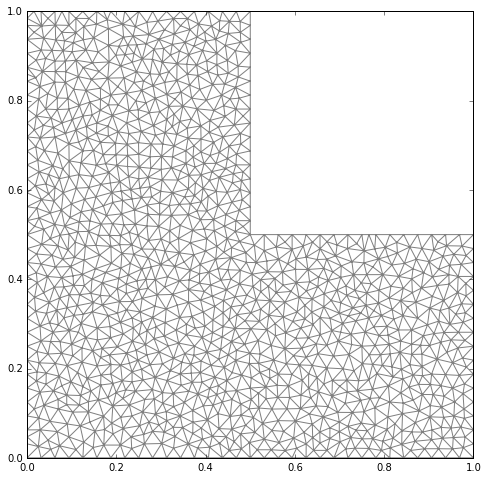

In [43]:
# Generate an arbitrary mesh

n=32
geometry1=mshr.Rectangle(Point(0.0,0.0), Point(1,1))
geometry2=mshr.Rectangle(Point(0.5,0.5), Point(1.5,1.5))
geometry = geometry1 - geometry2
mesh = mshr.generate_mesh(geometry, n)
plt.figure(figsize=(8,8))
plot(mesh)

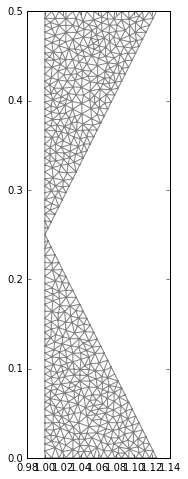

In [41]:
# Get the boundary

bmesh = BoundaryMesh(mesh, "exterior", True)

# Arbitrary transformation
def Transf(bmesh):
    new_geometry = []
    for point in bmesh.coordinates():
        if point[0] == 1:
            new_geometry.append([point[0], point[1]])
    
    new_geometry = sorted(new_geometry, key = lambda x:x[1])
    
    for point in new_geometry[::-1]:
        new_geometry.append([point[0]  + 0.5 * (abs(0.25 - point[1])), point[1]])
    
    # Generate the points
    return [Point(x,y) for x,y in new_geometry][::-1]

# Apply the transformation and generate the mesh
domain_vertices = Transf(bmesh)
new_geometry = mshr.Polygon(domain_vertices)
mesh = mshr.generate_mesh(geometry,n)
plt.figure(figsize=(8,8))
plot(mesh)

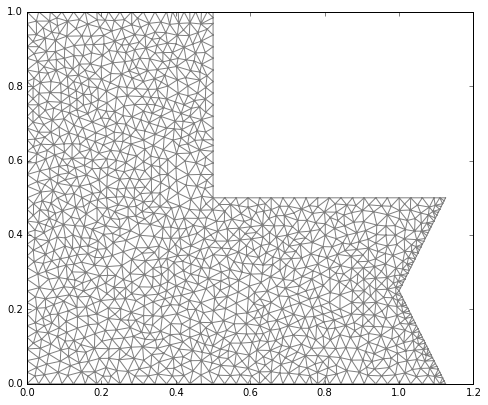

In [44]:
# Union of meshes with the same resolution
mesh = mshr.generate_mesh(geometry + new_geometry, n)
plt.figure(figsize=(8,8))
plot(mesh)